# task4

1. 了解ajax加载
2. 通过chrome的开发者工具，监控网络请求，并分析
3. 用selenium完成爬虫
4. 爬取网址如下：
<br>用selenium爬取https://news.qq.com/ 的热点精选
<br>每一行如下
标号（从1开始）,标题,链接,...（前三个为必做，后面内容可以自己加）
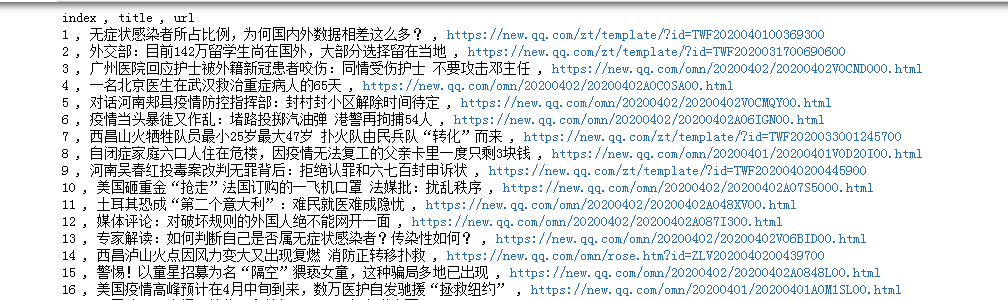


In [1]:
import time
from  selenium import webdriver
driver=webdriver.Chrome(executable_path="C:/Program Files (x86)/Google/Chrome/Application/chromedriver.exe")
driver.get("https://news.qq.com")
#了解ajax加载
for i in range(1,100):
    time.sleep(2)
    driver.execute_script("window.scrollTo(window.scrollX, %d);"%(i*200))

In [2]:
from bs4 import BeautifulSoup
html=driver.page_source
bsObj=BeautifulSoup(html,"lxml")

In [3]:
jxtits=bsObj.find_all("div",{"class":"jx-tit"})[0].find_next_sibling().find_all("li")

In [70]:
print("index",",","title",",","url")
for i,jxtit in enumerate(jxtits):
#     print(jxtit)
    
    try:
        text=jxtit.find_all("img")[0]["alt"]
    except:
        text=jxtit.find_all("div",{"class":"lazyload-placeholder"})[0].text
    try:
        url=jxtit.find_all("a")[0]["href"]
    except:
        print(jxtit)
    print(i+1,",",text,",",url) 


index , title , url
1 , 无症状感染者所占比例，为何国内外数据相差这么多？ , https://new.qq.com/zt/template/?id=TWF2020040100369300
2 , 外交部：目前142万留学生尚在国外，大部分选择留在当地 , https://new.qq.com/zt/template/?id=TWF2020031700690600
3 , 广州医院回应护士被外籍新冠患者咬伤：同情受伤护士 不要攻击邓主任 , https://new.qq.com/omn/20200402/20200402V0CNDO00.html
4 , 一名北京医生在武汉救治重症病人的65天 , https://new.qq.com/omn/20200402/20200402A0C0SA00.html
5 , 对话河南郏县疫情防控指挥部：封村封小区解除时间待定 , https://new.qq.com/omn/20200402/20200402V0CMQY00.html
6 , 疫情当头暴徒又作乱：堵路投掷汽油弹 港警再拘捕54人 , https://new.qq.com/omn/20200402/20200402A06IGN00.html
7 , 西昌山火牺牲队员最小25岁最大47岁 扑火队由民兵队“转化”而来 , https://new.qq.com/zt/template/?id=TWF2020033001245700
8 , 自闭症家庭六口人住在危楼，因疫情无法复工的父亲卡里一度只剩3块钱 , https://new.qq.com/omn/20200401/20200401V0D20I00.html
9 , 河南吴春红投毒案改判无罪背后：拒绝认罪和六七百封申诉状 , https://new.qq.com/zt/template/?id=TWF2020040200445900
10 , 美国砸重金“抢走”法国订购的一飞机口罩 法媒批：扰乱秩序 , https://new.qq.com/omn/20200402/20200402A07S5O00.html
11 , 土耳其恐成“第二个意大利”：难民就医难成隐忧 , https://new.qq.com/omn/20200402/20200402A048XV00.html
12 , 媒体评论

## 写入csv

In [7]:
import csv
from lxml import etree

In [25]:
html = driver.page_source
tree = etree.HTML(html)
link = tree.xpath('//li[@class="item cf"]/div[@class="detail"]/h3/a/@href')
title = tree.xpath('//li[@class="item cf"]/div[@class="detail"]/h3/a/text()')
print(len(link))
print(len(title))

8
8


In [26]:
with open('news.csv', 'w', newline='', encoding='utf-8') as f:
    f_csv = csv.writer(f)
    f_csv.writerow(['index', 'title', 'url'])
    for i in range(8):
        f_csv.writerow([i+1, title[i], link[i]])